# Empalme con la clase anterior: Clasificación:

La regresion lineal trabaja sobre el continuo. Pero la clasificacion trabaja sobre el discreto. La regresion lineal no es apropiada para estos casos.
Para clasificacion necesitamos poner mas **estadistica**.

Ejemplos donde se necesiten estas variables discretas.

* Diagnostico de enfermedad de un paciente. Positivo, negativo.
* Clasificar fotos. Sigue siendo discreto.
* Spam email (mensajes basura).
* Fraude en tarjetas de credito.
* Posibilidad de que un cliente no pague una deuda.



 ## Metodos supervisados mas importantes
 * Regresi'on logistica (hoy)
 * Artificial Neural Networks (ANN: Redes neuronales artificiales) (lo veremos)
 * Support Vector Machines (SVM: Maquinas de soporte vectorial) ( lo veremos)
 * Naive Bayes (usa teor'ia Bayesiana) (no lo vemos, ni esta en el libro)
 * Arboles de decision (no lo veremos)
 * bosques aleatorios (random forest) (tampoco lo vemos)

 ## Regresi'on logistica
 Inicialmente podemos pensar en dos categorias (binario) (falso, verdadero o blanco o negro...., si o no, perro o gato, etc)

 En regresion lineal pensamos en la siguiente hipotesis

 $$ h(\Theta) = X \Theta = Y $$

 La funcion de costo que vimos es

 $$J(\Theta) = \frac12 \| X \Theta - Y \|^2 $$
 la idea es mininmizar esta funcion de costo.

 Sin embargo esto se ve apropiado para decidir en una variable binaria o dicotomics. Debemos agregar estadistica. Por ejemplo
 cual es la **probabilidad** de que un paciente $q_i$ tenga cancer dadas ciertas condiciones. Esta es una probabilidad condicional.

 $$p(q_i \text{ tenga cancer } \mid  x_i, \Theta ) \ge \text{umbral}  $$

 Se presentan dificultades:
 * Hasta ahora $h(\Theta)$ es continua y tenemos un problema discreto
 * $h(\Theta)$ no es facil de interpretar en este caso, que es discreto.

 Tratamos de formular un modelo simple para resolver este problema.
 La primera aproximacion (naive, ingenua) es
Hay dos clases $y=0, y=1$
En dos dimensiones (los parametros $\Theta$)

 $$p_{ingenua} = p(y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x $$

 Que problema tiene esta aproximacion?
 La probabilidad esta en el $[0,1]$ y  esta funcion va en $(-\infty, \infty)$.

 Para poder obtener un modelo razonable introducimos el concepto de **chance**.
 (**odds**) El chance es la razon (radio, fraccion) entre la probabilidad de que un evento ocurra y aqueya de que no ocurra.

 $$ \text{chance} = \frac{p}{p-1}$$

 Noten que si $p=0$, el chance es 0. Si $p=1/2$, chance es $1$, si $p=1$ el chances es $\infty$.

 El chance todavia no es lo que quisieramos para medir el resultado de una clasifcacion. Por que esta en el intervalo $(0, \infty)$
 Para poder limitar el chance en un itervalo mas razonable, pensamos en el logaritmo del chance que va a mejorar la medida.

 $$ \log \frac{p}{1-p} $$
 de esta forma si $p=1/2$, el chance es 0. Si $p>1/2$ el (log) chance es positivo y si es menor que 1/2 es negativo. Ademas es simetrica

 $$\log \frac{p}{1-p} = \log p - \log(1-p) = -[ \log(1-p) - \log p] = - \log \frac{1-p}{p} $$

 Mejoramos el modelo con

 $$\theta_0 + \theta_1 x = \log \frac{p}{p-1} $$
 A esto lo llaman **regresion logistica**. Voy a despejar $p$ que es la probabilidad.

Sea $y = \theta_0 + \theta_1 x$
 \begin{eqnarray}
\log \frac{p}{1-p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1-p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
p &=& \frac{1}{ 1 + \mathrm{e}^{-y}} \\
p &=& \frac{1}{1 + \mathrm{e}^{-X \Theta}}
\end{eqnarray}

donde $y = \theta_0 + \theta_1 x = X \theta$
$X=(1, x)^T$ , $\Theta=(\theta_0, \theta_1)$


La funci'on

$$S(t) = \sigma(t) = \frac{1}{1 + \mathrm{e}^{-t}} $$
se le llama **sigmoide log'istica**. Va a ser muy importante en el resto del curso (sobre todo en redes neuronales).

Hagamos una grafica.

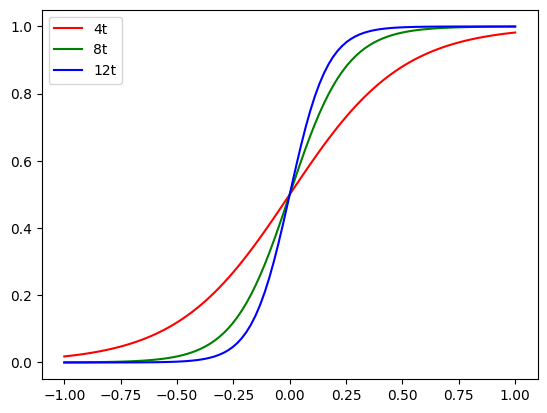

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define the sigmoid function
def s(t):
    return 1/(1 + np.exp(-t))

# plot sigmoid for values 4t, 8t, 12t in [-1,1]
t = np.linspace(-1, 1, 100)

plt.plot(t, s(4*t), 'r', label='4t')
plt.plot(t, s(8*t), 'g', label='8t')
plt.plot(t, s(12*t), 'b', label='12t')
plt.legend()

Veamos algunas propiedades de la logistic sigmoid.

1.
$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t) $$

2.
$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \frac{1}{1 + \mathrm{e}^{-t}} \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{1 + \mathrm{e}^{-t}} \left ( 1 - \frac{1}{1 + \mathrm{e}^{-t} } \right ) =S(t)(1-S(t)) $$

Vamos ahora a definir la hipotesis:
En general

$$X \Theta = Y  \quad , \quad X \in \mathrm{R}^{m \times n} \quad , \Theta \in \mathrm{R}^{n \times 1}  \quad , \quad Y = \mathrm{R}^{m \times 1} $$

$$h(\Theta , x^{(i)}) = S( x^{(i)} \cdot \Theta) = \frac{1}{1 + \mathrm{e}^{-(x^{(i)})^T \Theta}}$$

Podemos pensar en esta nueva hipotesis como una probabilidad.

$$h(\Theta, x^{(i)}) = p( Y^{(i)} = 1 | x^{(i)}, \Theta )  $$
donde $Y^{(i)}=0, 1$.

En este momento la hipotesis sigue estando definida en el continuo.
Se umbral $\gamma$, por ejemplo $\gamma=0.5$, definimos la siguiente hipotesis **binaria**

\begin{eqnarray}
h_{binaria}(\Theta, x^{(i)}) =
\begin{cases}
1 \quad , \quad \text{si} \quad S(x^{(i)}) > \gamma \\
0 \quad , \quad \text{si} \quad S(x^{(i)}) < \gamma \\
\end{cases}
\end{eqnarray}
El igual no importa.

Tenemos todos los elementos para la regresion logistica. Como en la mayoria de los metodos de ML se necesitan los siguientes pasos:

1. Encontrar una funcion de costo $J(\theta)$.
2. Hallar el gradiente de la funcion de costo $\nabla J(\theta)$.
3.  Encontrar $\theta$, $\theta^{(k+1)} = \theta^{(k)} - \alpha \nabla J(\theta^{(k)})$ (ac'a esta el entrenamiento)
4. Prueba y uso de la herramienta.

### Funci'on de costo para regresion logistica.
Recuerde en la regresion lineal que

$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m ( h_i(\theta, X) - Y_i))^2 $$

El problema como lo veremos es que esta funcion de costo no es convexa.
Veamos un ejemplo con **una sola muestra**.  Asumamos

* $Y_1=1$
* $x_1=1$
* Una sola dimension $\theta$

$$J(\theta) = \frac12 ( S(1 + \theta) - 1)^2 $$

Como mostramos que esta funcion no es convexa? Buscamos la segunda derivada.

Usamos

$$S'(t) = \mathrm{e}^{-t} S^2(t) $$
Veamos

$$\frac{d J(\theta)}{\partial \theta}  =(S(1+\theta) -1) \mathrm{e}^{1-\theta} S^2(1+\theta) = -\exp(-1 - \theta) S^2(1 + \theta) + S^3(1+\theta) \exp(-1 - \theta)$$


$$\frac{d^2 J(\theta)}{\partial \theta^2}= \exp(-1 - \theta) S^2(1+\theta) - 2 S^3(1 + \theta) \exp(-2 - 2 \theta) + 3 S^4(1 + \theta) \exp(-2 - 2 \theta) - S^3(1 + \theta) \exp(-1 - \theta) $$

Hagamos una grafica de esto en Python

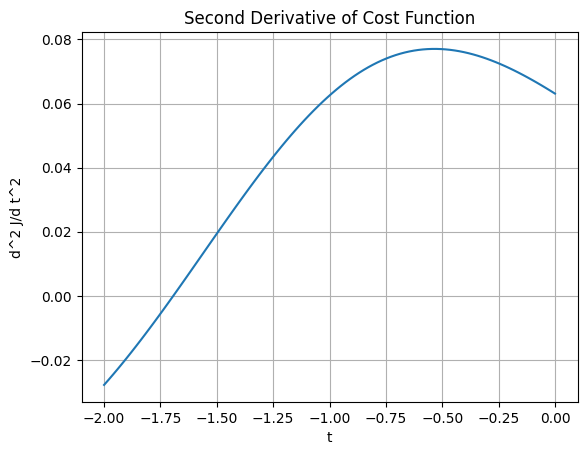

In [2]:
# graph the second derivative d^2 J/d theta^2  above
import numpy as np
import matplotlib.pyplot as plt

# define the sigmoid
def s(t):
    return 1/(1 + np.exp(-t))

# define the second derivative as a function of t
def second_derivative(t):
  s_t = s(1+t)
  return np.exp(-1 - t) * s_t**2 - 2 * s_t**3 * np.exp(-2 - 2 * t) + 3 * s_t**4 * np.exp(-2 - 2 * t) - s_t**3 * np.exp(-1 - t)


# define the domain
T = np.linspace(-2,0, 100)

# graph the function
plt.plot(T, second_derivative(T))
plt.xlabel('t')
plt.ylabel('d^2 J/d t^2')
plt.title('Second Derivative of Cost Function')
plt.grid(True)
plt.show()

La segunda derivada de $J$ tiene valores positivos y negativos. Este el problema, la funcion $J$ ni es concava ni es convexa.  Entonces debemos estudiar la forma de obtner una funcion de costo que sea convexa.

La convexidad es muy util, especialmente cuando se usan metodos de gradiente como los que usamos en esta clase.

Vamos entonces a busar una mejor funcion de costo.
Supongamos que queremos clasificar imagenes de perros y gatos.
Decimos que

$$h(\theta, x^{(i)}) = P( y_i = \text{gato} \mid x^{(i)}; \theta) = S((x^{(i)})^T \theta) = \frac{1}{1 + \mathrm{e}^{-(x^{(i)})^T \theta }} \tag{1} $$

La probabilidad de que el objeto sea un perro es

$$p(y_i = \text{perro} | x^{(i)}; \theta) = 1 - p(y_i= \text{gato}) | x^{(i)}, \theta)  = 1 - h(\theta, x^{(i)})  \tag{2} $$

Es interesante que estas dos ecuaciones (1) y (2) se pueden escribir como una

$$p(y_i | x^{(i)}; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{(1 - y_i)} \tag{3} $$

Ahora asumimos que tenemos un conjunto de imagenes de perros y gatos (solos)
Entonces estos eventos son estadisticamente independientes, pues una imagen es o perro o gato, nada mas. Entonces la probabilidad del conjunto es el producto de las probabilidades individuales.
$Y$ es el conjunto de etiquetas (labels)
$X$ es el conjunto de cartas (datos)
y usando la Ecuacion (3).

$$\mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)}) (1 - h ( \theta, x^{(i)})  \tag{4} $$
A $\mathcal{L}$ se le concoce como **likelihood** (verosimilitud).

Ahora bien hallar el minimo de $\mathcal{L}$ no parece f'acil. Sacar la derivada de una productoria se vuelve complejo (formula Leibniz). Entonces
se puede usar el hecho de que el logaritmo es monotono y no cambia la localizacion del minimo o maximo.

Entonces tomando el logaritmo de (4)

$$\log \mathcal{L}(\theta) = \log p( Y | X; \theta) =
\sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]  $$
Ahora bien la funcion logaritmo es concava. Entonces cambiamos el signo para que sea convexa.
Maximizar la verosimilitud es equivalente a minimizar su negativo.

$$J(\theta) = -\frac1m \sum_{i=1}^m   y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] $$





### Gradiente de la funcion de costo.
Para esto vamos a encontra el gradiente de los t'erminos dentro de la suma y al final sumamos.

$$\frac{ y_i \log h(\theta, x_i)}{\partial \theta_k} = y_i \frac{1}{S} S' x_{ik} = y_i \frac{1}{S} x_{ik} S ( 1- S) = y_i x_{ik} (1-S)$$
donde $x_{ik}$ es la componente $k$ del vector de datos $x^{(i)}$.

De igual forma

$$\frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k} = -(1-y_i) \frac{1}{1-S} S' x_{ik} = (y_i - 1) \frac{1}{1 -S} S ( 1- S) x_{ik} = (y_i - 1) S x_{ik} $$

Sumando los dos ultimos calculos


 \begin{eqnarray} \frac{ y_i \log h(\theta, x_i)}{\partial \theta_k} + \frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k} &=&  y_i(1 - S) x_{ik} + (y_i-1) S x_{ik}  \\
&=&  y_i x_{ik} - {y_i S x_{ik}} + \cancel{y_i S x_{ik}} - S x_{ik} \\
&=& (y_i - S) x_{ik} \\
&=& - (h (x^{(i)}, \theta) - y_i) x_{ik}
\end{eqnarray}
Regresamos a la funcion de costo y sumamos

$$\frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m ( h (\theta, x^{(i)} - y_i ) x_{ik}.  $$

### Decision Boundary: Frontera de decision.
Recuerden:

\begin{eqnarray}
h_{binaria}(\Theta, x^{(i)}) =
\begin{cases}
1 \quad , \quad \text{si} \quad S(x^{(i)}) > \gamma \\
0 \quad , \quad \text{si} \quad S(x^{(i)}) < \gamma \\
\end{cases}
\end{eqnarray}
Asuma que el umbral es $\gamma=0.5$


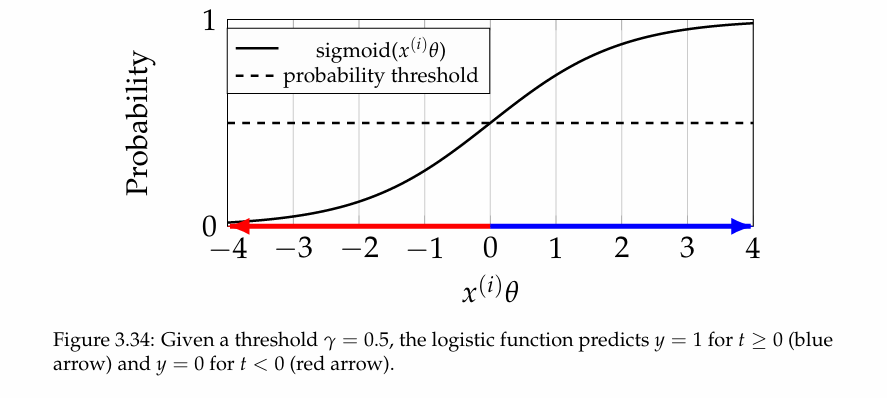

Recuerden que el argumento de la Sigmoid $S(t) = \sigma(t)$ es

$$t = -(x^{(i)})^T \theta $$
Para nosotros es importante si $t<0$  o $t>0$. La frontera se encuentra en $t=0$. Esto en que se traduce en nuestro problema.

Se traduce en:

$$(x^{(i)})^T \theta = x_1 + x_1 \theta_0 + x_2 \theta_1 + \cdots + x_{n-1} \theta_n = 0  $$

Esto es lo que hay que encontrar para usar el algoritmo de regresion logistica con ML.

Los pasos son:
1. Usar la hipotesis $h(x^{(i)}, \theta) = S((x^{(i)})^T \theta)$
2. Con el metodo del gradiente encontrar $\theta$.
3. Una vez se encuentra $\theta$ se halla el hiperplano

$$x^T \theta = 0. $$
Este hiperplano es la frontera de decision.

Veamos una grafica, que es el ejercicio que ustedes har'an en la proxima tarea.



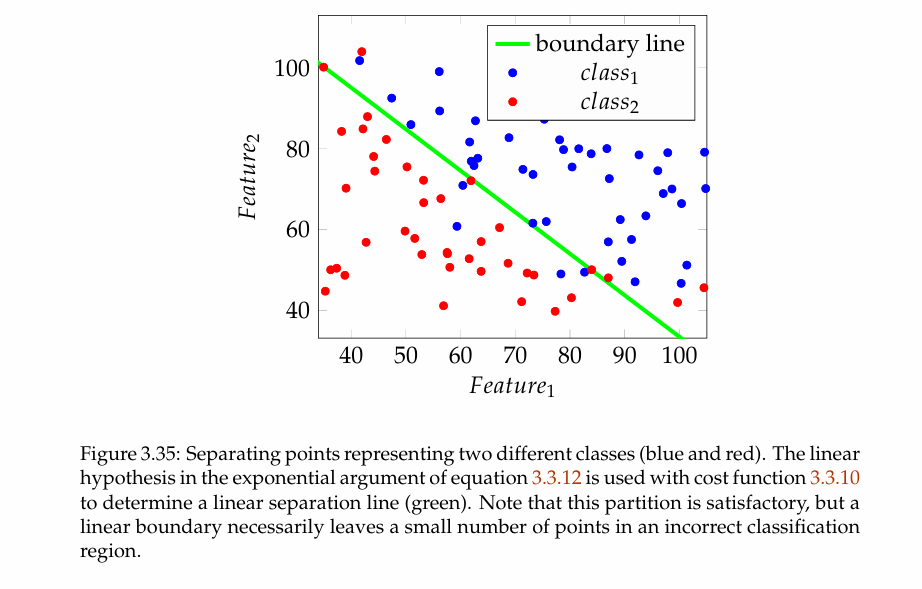

Un conjunto es **linealmente separable** si existe un hiperplano que separe totalmente el conjunto es las dos clases distintas que lo component. En la Figura 3.35 no hay separaci'on lineal, pero al fin y al cabo esto es un problema de optimizaci'on y hay una relacion costo/beneficio.

Que tal si el conjunto esta **lejos** de ser linealmente separable. Por ejemplo algunos puntos en el centro en forma mas o menos circular y otros lejos del centro. La soluci'on est'a en **redefinir** la hipotesis de la siguiente forma

$$h(\theta, X) = S( g(\theta, X)) $$
donde $g(\theta, X)$ no es lineal. Puede ser polin'omica. El siguiente ejemplo se usa en la siguiente tarea
Un polinomio en $x_1, x_2$ en dos  variables de grado 8.

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2+ j]} x_2^{j} x_1^{i-j} $$

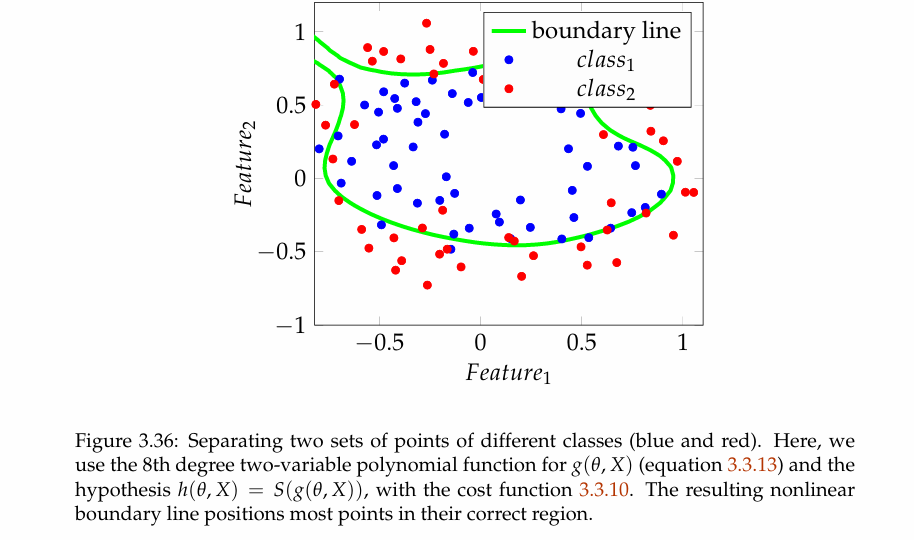

La Figura 3.36 muestra el ejemplo de unos datos que no son linealmente separables, separados por una curva polinomial de orden 8 como se muestra en la ecuaci'on de arriba.

### Regularizacion en regresion logistica.
A la funcion de costo de regresion logistica le agregamos la regularizacion como muestra la siguiente ecuacion

$$J(\theta) = -\frac1m \sum_{i=1}^m   y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})] +  \frac{\lambda}{2m} \| \theta \|^2$$

El resultado de regularizar con $\lambda=?$ en el ejemplo anterior est'a dado por la Figura 3.39

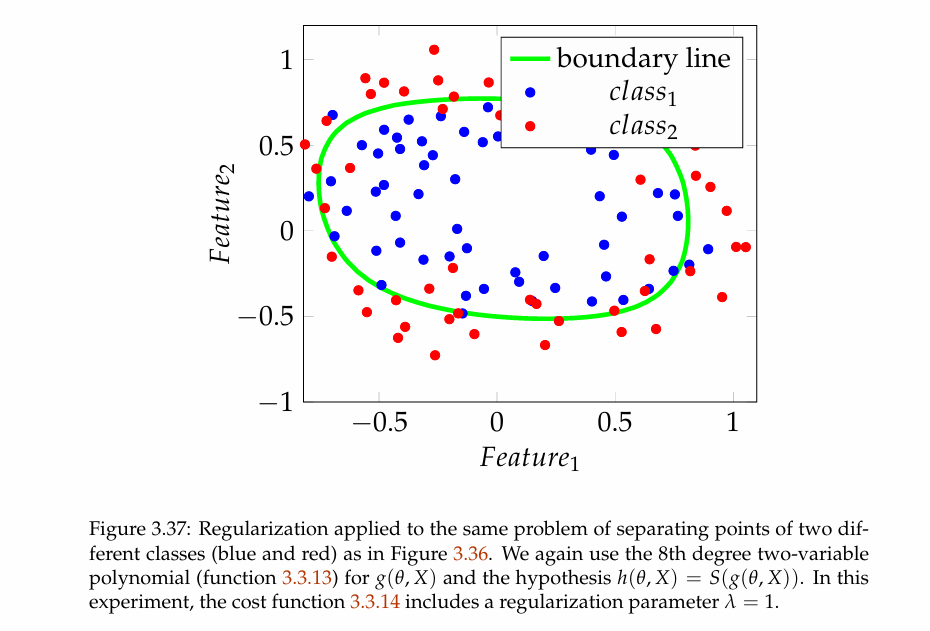

# Proxima clase: Clasificacion multiclase $K>2$.
Que pasa si en vez de dos objetos (perros y gatos) tenemos 3 o mas?
Vamos a estudiar varios metodos.

1. Uno contra todos (el resto).
2. Generalizar la sigmoid $S(t)=\sigma(t)$ a mas des dos clase. La nueva funci'on multiclase se llama **softmax function**.
3. Vamos a hablar de el **one hot encoded**.
Por ejemplo, perros, gatos, conejos

\begin{eqnarray}
\text{perros} = \begin{pmatrix} 1 \\ 0 \\ 0  
\end{pmatrix}  \quad , \quad
\text{gatos} = \begin{pmatrix} 0 \\ 1 \\ 0  
\end{pmatrix}  \quad , \quad
\text{conejos} = \begin{pmatrix} 0 \\ 0 \\ 1  
\end{pmatrix}  
\end{eqnarray}